# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [1]:
from scipy.stats import uniform
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.26041941 2.88632848 2.87990813 2.04301887 2.47719762 2.01135441
 2.06927947 2.55221815 2.23787194 2.88318176]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

In [2]:
import numpy as np

def generate_uniform_random_numbers(bottom, ceiling, count):
    x = uniform.rvs(size=count)
    return bottom + (ceiling - bottom) * x

In [3]:
bottom1 = 10
ceiling1 = 15
count1 = 100

randoms1 = generate_uniform_random_numbers(bottom1, ceiling1, count1)
print(randoms1)

bottom2 = 10
ceiling2 = 60
count2 = 1000

randoms2 = generate_uniform_random_numbers(bottom2, ceiling2, count2)
print(randoms2)

[12.77003199 13.34084643 11.3555385  14.45080009 13.18815275 12.43220212
 13.15198115 13.75315995 11.87931651 14.00946092 13.75281913 12.24006773
 11.08249334 13.33939093 12.34521722 11.84782089 13.65298877 13.33314451
 14.76165333 12.31528268 14.3011627  10.15163196 13.37858348 10.82545535
 14.47913384 14.67183242 12.35981116 10.85429903 10.66237811 11.2734212
 11.01121389 11.98102451 14.87217724 11.80228173 14.02386698 14.87178108
 12.08469877 11.51064579 12.13497142 12.87833312 14.4647333  13.2438136
 11.09100389 11.70390766 12.57865629 11.07505057 10.28010393 12.26519953
 14.01588902 11.62182345 14.22621343 11.0173083  12.29195412 10.28690678
 12.41712082 14.0751648  13.87119811 14.03328992 10.98634245 12.10494605
 11.33983159 10.02274448 14.68677699 12.92647086 11.24597114 12.45006159
 11.2206314  11.76346204 13.06355    12.86573223 10.27337752 12.16678381
 11.66617005 11.02901859 14.44635923 14.13271337 13.37650643 11.05559502
 12.6983461  12.73966574 13.2343067  14.46799271 10.1

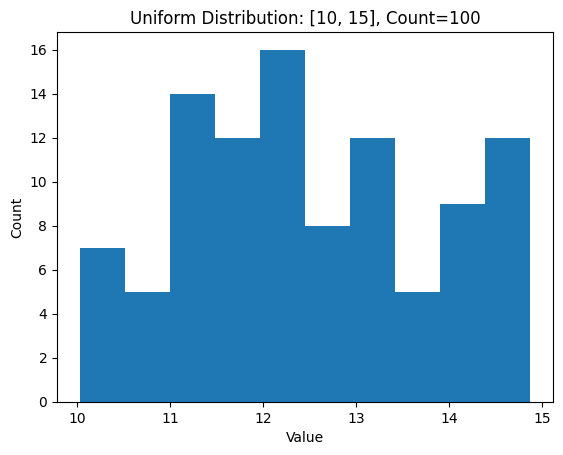

In [4]:
import matplotlib.pyplot as plt

plt.hist(randoms1, bins=10)
plt.title('Uniform Distribution: [10, 15], Count=100')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

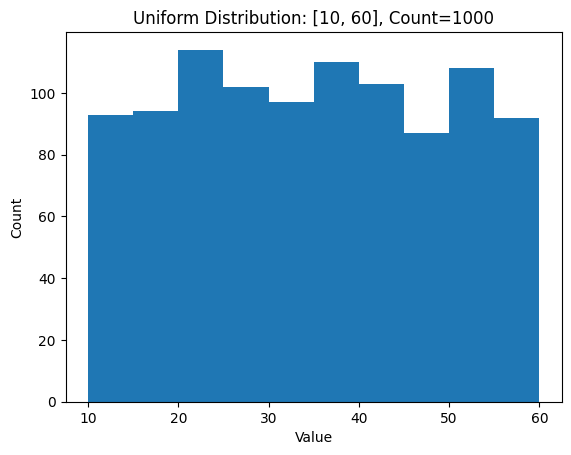

In [5]:
plt.hist(randoms2, bins=10)
plt.title('Uniform Distribution: [10, 60], Count=1000')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

How are the two distributions different?

In [ ]:
# Both distributions are uniformly distributed, but the second distribution has a wider spread and flatter shape, because it has a 
# larger range of values and a larger sample size.

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

In [6]:
def generate_normal_random_numbers(mu, sigma, count):
    return np.random.normal(mu, sigma, count)

In [7]:
mu1 = 10
sigma1 = 1
count1 = 1000

randoms1 = generate_normal_random_numbers(mu1, sigma1, count1)
print(randoms1)

mu2 = 10
sigma2 = 50
count2 = 1000

randoms2 = generate_normal_random_numbers(mu2, sigma2, count2)
print(randoms2)

[11.01017663  7.57293844 10.57418304  9.77282872 10.95561821 11.81672668
 10.99876483 11.13147843 10.08252964  9.92821192  9.38013275 10.52178371
  9.92913143  9.67032855  9.4597863  10.91344288  9.32925118 10.34750416
 10.0776405   9.85881919  8.52050181 11.22067228 11.46489025 10.47216476
  9.60620004  9.18989544 10.22067972  9.42766452 10.17604612  9.9827319
 10.99096886 11.78643807 10.53440018 10.11472405 10.36283745  8.65872974
 10.17877442 10.52020654 10.52988922  9.91378513 10.94165676 10.90317366
  8.84332863 10.10775982 10.46913144 10.28538171  9.6759489   9.88839327
  9.1485678   8.80745945 10.46755839  9.71299419  8.52897461 10.55625496
  9.76088401  8.47005813 10.86945501 11.81646677 10.55928907  9.41781106
  9.21798453 10.70330112  9.96279931 10.01635439 10.03673458 10.14407813
 11.54757918  9.53003872  9.12597601 11.14514513 10.08810448 10.12224667
 11.08747976 11.56839511 10.03001252  8.19945817  9.2624668   9.66080241
  9.311291   10.32139321 13.13064218 10.61088662  9.

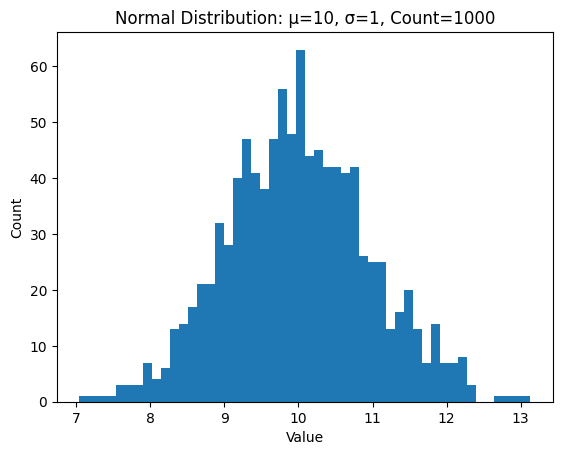

In [8]:
plt.hist(randoms1, bins=50)
plt.title('Normal Distribution: μ=10, σ=1, Count=1000')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

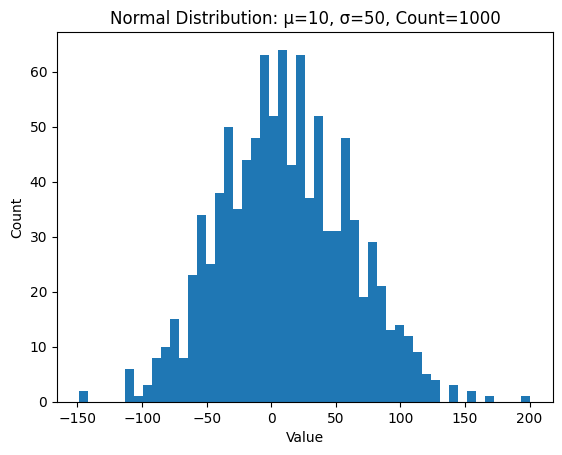

In [9]:
plt.hist(randoms2, bins=50)
plt.title('Normal Distribution: μ=10, σ=50, Count=1000')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

How are the two distributions different?

In [ ]:
# The second one has more outliers considering the standard deviation is much higher.


## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

In [10]:
import pandas as pd

In [11]:
vehicles = pd.read_csv("vehicles.csv")

In [12]:
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


2. CO2 Emission Grams/Mile 

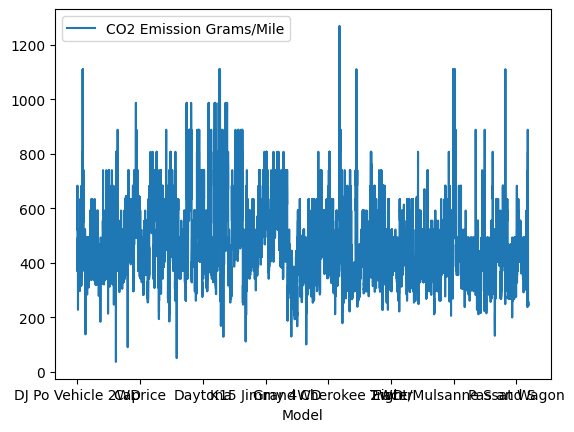

In [13]:
vehicles.plot(x='Model', y='CO2 Emission Grams/Mile', kind='line')
plt.show()

3. Combined MPG

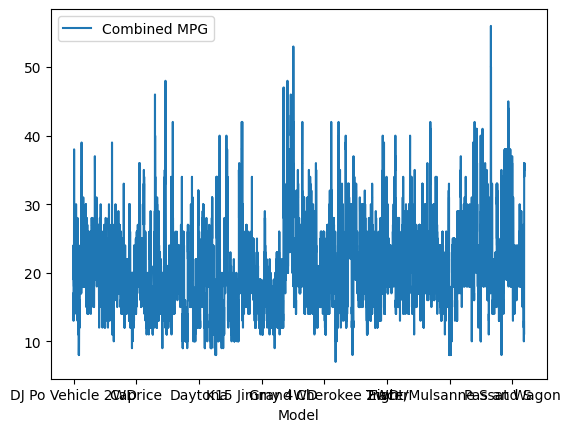

In [14]:
vehicles.plot(x='Model', y='Combined MPG', kind='line')
plt.show()

Which one(s) of the variables are nearly normally distributed? How do you know?

In [ ]:
# The second one because the range is smaller, so the variation isnt as big.

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with a mean of 1 and 100 and a size of 1000.

1. Plot the distributions as histograms with the number of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

In [18]:
def generate_exponential(size):
    return np.random.exponential(scale=10, size=size)

In [19]:
exp1 = generate_exponential(size=1000) / 10

exp100 = generate_exponential(size=1000) * 10

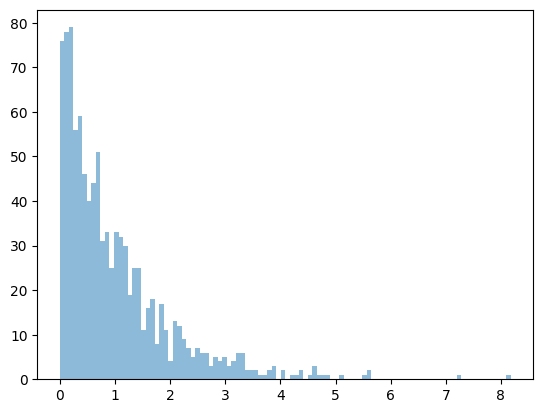

In [25]:
plt.hist(exp1, bins=100, alpha=0.5, label='Mean=1')
plt.show()

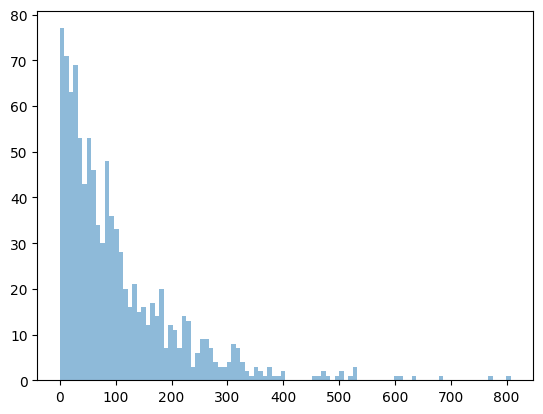

In [26]:
plt.hist(exp100, bins=100, alpha=0.5, label='Mean=100')
plt.show()

How are the two distributions different?

In [ ]:
# their distributions are similar but the second has a way larger range of numbers.

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

Hint: This is same as saying P(x<15)

In [29]:
from scipy.stats import expon

mean = 10

rate = 1 / mean

prob = expon.cdf(15, scale=mean)

print(f"Probability that x < 15: {prob:.2f}")


Probability that x < 15: 0.78


What is the probability that the customer will spend more than 15 minutes

In [30]:
1 - 0.78

0.21999999999999997